## Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [212]:
df=pd.read_csv('train.csv')

In [213]:
df=df[['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]

In [214]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [259]:
df_2=df.copy()

df_2['Title']=df_2['Name'].apply(lambda x: x.split('.')[0])

df_2['Title']=df_2['Title'].apply(lambda y: y.split(',')[1])
df_2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,Rev
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,Miss
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,Miss
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,Mr


In [260]:
df_2.Title.value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Don               1
 Capt              1
 the Countess      1
 Jonkheer          1
 Sir               1
 Ms                1
 Lady              1
 Mme               1
Name: Title, dtype: int64

In [261]:
pd.crosstab(df_2['Title'],df_2['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [262]:
df_2['Title']=df_2['Title'].replace('Mlle','Miss',regex=True)
df_2['Title']=df_2['Title'].replace('Mme','Mrs',regex=True)
df_2['Title']=df_2['Title'].replace('Ms','Miss',regex=True)

In [263]:
pd.crosstab(df_2['Title'],df_2['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,185,0


In [19]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [269]:
df=df.drop(['Cabin','Ticket'],axis=1)

In [271]:
df['Age']=df['Age'].fillna(df['Age'].mean())

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

df.Age=round(df['Age'],1)
df.Fare=round(df.Fare,1)

In [273]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.3,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,23.4,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0,C,1


In [276]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [278]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699327,0.523008,0.381594,32.205724,0.383838
std,257.353842,0.836071,13.001940,1.102743,0.806057,49.693523,0.486592
min,1.000000,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.900000,0.000000
50%,446.000000,3.000000,29.700000,0.000000,0.000000,14.500000,0.000000
75%,668.500000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.300000,1.000000


In [279]:
df_1=df.copy()

In [280]:
df_1=df_1.drop(['Name','PassengerId'],axis=1)

In [281]:
df_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2,S,0
1,1,female,38.0,1,0,71.3,C,1
2,3,female,26.0,0,0,7.9,S,1
3,1,female,35.0,1,0,53.1,S,1
4,3,male,35.0,0,0,8.0,S,0


## Class

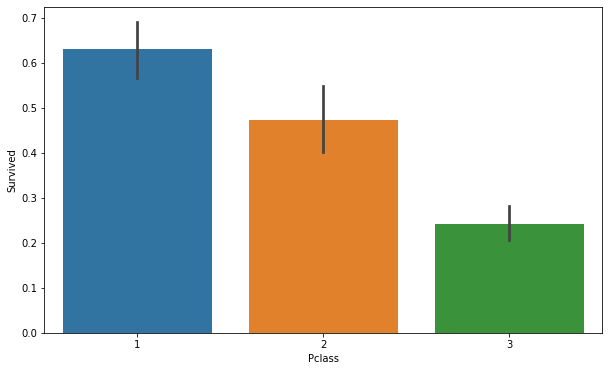

In [451]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_1,y='Survived',x='Pclass')
plt.show()

### Hence, First class has best rate of survival

## Gender

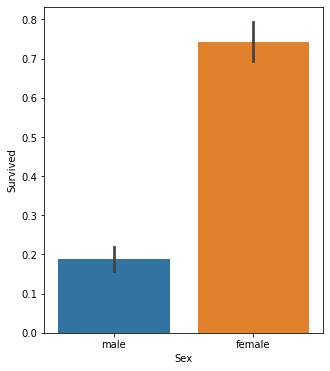

In [455]:
plt.figure(figsize=(5,6))
sns.barplot(x='Sex',y='Survived',data=df_1)
plt.show()

### Since, children and females were evacuated first, naturally females have a higher rate of survival

## Age

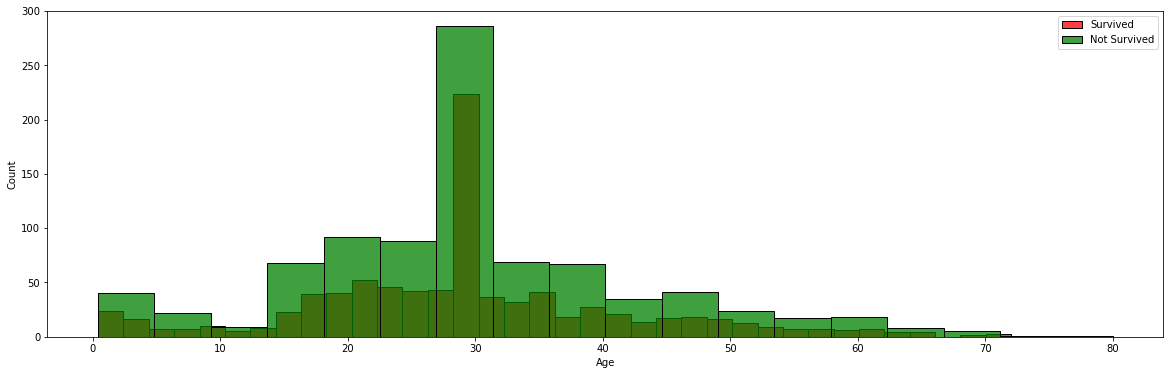

In [480]:
plt.figure(figsize=(20,6))

a=sns.histplot(x=df_1.Age,data=df_1[df_1['Survived']==1].Age, label='Survived',color="red",bins=40)
a=sns.histplot(x=df_1.Age,data=df_1[df_1['Survived']==0].Age, label='Not Survived',color="green",bins=18)
plt.legend()
plt.show()

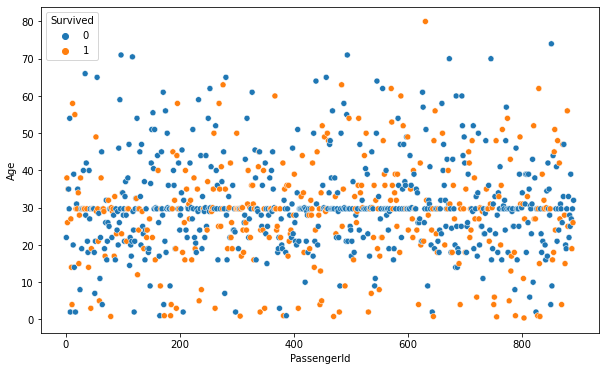

In [489]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='PassengerId',y='Age',hue='Survived')
plt.show()

### Most people who died were around 30 years

## Embarked

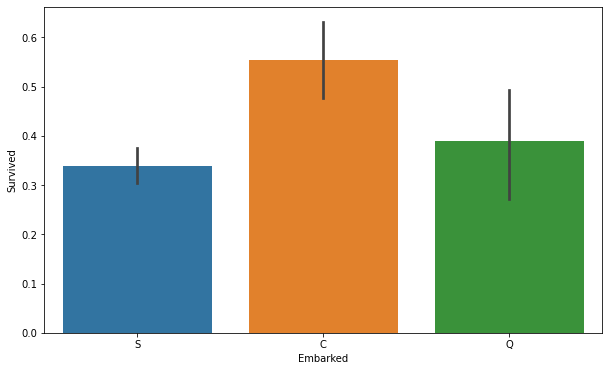

In [492]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_1,y='Survived',x='Embarked')
plt.show()

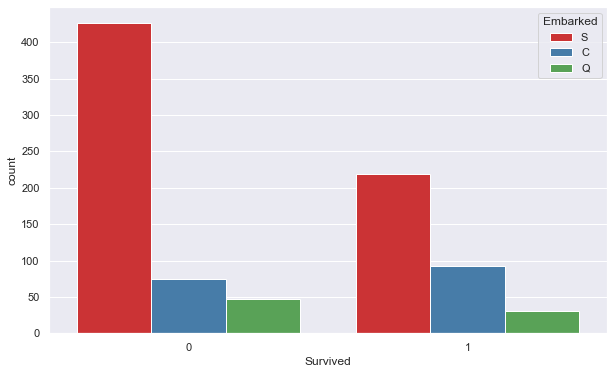

In [499]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.countplot(data=df_1,x='Survived',hue='Embarked',palette='Set1')
plt.show()

### People who embarked from S i.e Southampton have the least rate of survival while those who embarked from C i.e Cherbourg have the highest 

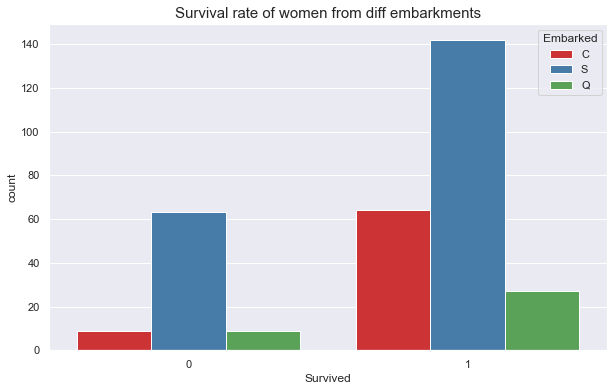

In [504]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
plt.title('Survival rate of women from diff embarkments',size=15)
sns.countplot(data=df_1[df_1['Sex']=='female'],x='Survived',hue='Embarked',palette='Set1')
plt.show()

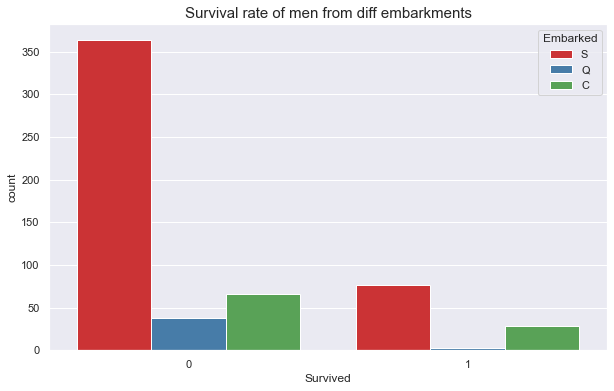

In [505]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
plt.title('Survival rate of men from diff embarkments',size=15)
sns.countplot(data=df_1[df_1['Sex']=='male'],x='Survived',hue='Embarked',palette='Set1')
plt.show()

## Men who embark in Queenstown barely have any chances of survival 

In [452]:
test_df=pd.read_csv('test_data.csv')

In [418]:
test_df.shape

(418, 7)

In [419]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [421]:
final_df=pd.concat([df_1,test_df],axis=0,)

In [422]:
final_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2,S,0.0
1,1,female,38.0,1,0,71.3,C,1.0
2,3,female,26.0,0,0,7.9,S,1.0
3,1,female,35.0,1,0,53.1,S,1.0
4,3,male,35.0,0,0,8.0,S,0.0


In [423]:
final_df.shape

(1309, 8)

In [424]:
final_df=pd.get_dummies(final_df,columns=['Sex','Embarked'],prefix=['s','e'],drop_first=True)

In [425]:
final_df=final_df.loc[:,~(final_df.columns.duplicated())]

In [427]:
final_df.index=np.arange(1,len(final_df)+1)

In [429]:
df_train=final_df.iloc[:891,:]
df_test=final_df.iloc[891:,:]

In [432]:
df_test.drop('Survived',axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [434]:
x_train=df_train.drop('Survived',axis=1)
y_train=df_train['Survived']

In [435]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,s_male,e_Q,e_S
1,3,22.0,1,0,7.2,1,0,1
2,1,38.0,1,0,71.3,0,0,0
3,3,26.0,0,0,7.9,0,0,1
4,1,35.0,1,0,53.1,0,0,1
5,3,35.0,0,0,8.0,1,0,1


In [436]:
y_train.head()

1    0.0
2    1.0
3    1.0
4    1.0
5    0.0
Name: Survived, dtype: float64

## Model Selection

In [437]:
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [167]:
model_params={
    'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
            'C':[1,10,20,50],
            'kernel':['rbf','linear']
        }
    },
    
    'LogisticRegression':{
        'model':LogisticRegression(multi_class='auto'),
    'params':{
        'C':[1,10,20,50],
        'penalty':['l1','l2'],
        'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
},
    
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10,100],
            'criterion':['gini','entropy'],
            'max_depth':[None,10,20,100],
            'max_features':["auto", "sqrt", "log2"]
        }
    },
    
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':["best", "random"],
            'max_depth':[None,1,10,20]
    }
},
    
    'xgboost':{
        'model':xgb.XGBClassifier(use_label_encoder=False),
        'params':{
            'n_estimators':[1,10,20,50],
            'max_depth':[1,5,10]
            
        }
     }
    
}   

In [168]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    
model_df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
model_df

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.p

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentatio

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[14:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,best_score,best_params
0,SVM,0.788086,"{'C': 50, 'kernel': 'linear'}"
1,LogisticRegression,0.795964,"{'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}"
2,RandomForest,0.836351,"{'criterion': 'gini', 'max_depth': 10, 'max_fe..."
3,DecisionTree,0.800508,"{'criterion': 'gini', 'max_depth': 10, 'splitt..."
4,xgboost,0.836363,"{'max_depth': 5, 'n_estimators': 50}"


In [513]:
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

## XGBoost Model

In [510]:
model_xg=xgb.XGBClassifier(use_label_encoder='False',max_depth= 5, n_estimators= 50,eval_metric='error')

In [511]:
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder='False', validate_parameters=1, verbosity=None)

In [516]:
model_xg.score(x_train,y_train)

0.9225589225589226

## Random Forest Model

In [438]:
rf=RandomForestClassifier(criterion= 'gini',
 max_depth=10,
  max_features= 'log2',
  n_estimators= 10)

In [439]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,Y_tr,Y_ts=train_test_split(x_train,y_train,test_size=0.3,random_state=42)

In [440]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=10)

In [519]:
rf.score(x_train,y_train)

0.9315375982042648

In [442]:
rf.score(X_ts,Y_ts)

0.9328358208955224

In [443]:
pred=rf.predict(df_test)

In [444]:
pred

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1.

In [445]:
prediction=pd.DataFrame(pred)
sub_df=pd.read_csv('gender_submission.csv')
dataset=pd.concat([sub_df['PassengerId'],prediction],axis=1)
dataset.columns=['PassengerId','Survived']
dataset

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [446]:
dataset.to_csv('submission_titanic_1.csv',index=False)